LOAN APPROVAL PREDICTION


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.shape


(4269, 13)

In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [7]:
df.drop(columns=['loan_id'], inplace=True)

In [8]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
df.columns =df.columns.str.strip()
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [10]:
# Create a new column 'Assets' that sums up the asset values
df['Assets'] = df.residential_assets_value + df.commercial_assets_value + df.luxury_assets_value + df.bank_asset_value


In [11]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000


In [12]:
df.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'], inplace=True)

In [13]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,39000000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,28800000


converting the string columns to numerical form

In [14]:
df.isnull().sum() # so no null values there

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
loan_status         0
Assets              0
dtype: int64

In [15]:
df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [16]:
def clean_data(dt):
    dt = dt.strip()
    return dt


In [17]:
df.education = df.education.apply(clean_data)
df.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [18]:
df['education'] = df['education'].replace(['Graduate', 'Not Graduate'], [1, 0])
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7312\2821990021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['education'] = df['education'].replace(['Graduate', 'Not Graduate'], [1, 0])


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,No,9600000,29900000,12,778,Approved,50700000
1,0,0,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,1,No,9100000,29700000,20,506,Rejected,57700000
3,3,1,No,8200000,30700000,8,467,Rejected,52700000
4,5,0,Yes,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,Yes,1000000,2300000,12,317,Rejected,7400000
4265,0,0,Yes,3300000,11300000,20,559,Approved,20000000
4266,2,0,No,6500000,23900000,18,457,Rejected,39000000
4267,1,0,No,4100000,12800000,8,780,Approved,28800000


In [19]:
df.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [20]:
df.self_employed = df.self_employed.apply(clean_data)
df.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1, 0])
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7312\1046082423.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['self_employed'] = df['self_employed'].replace(['Yes', 'No'], [1, 0])


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,Approved,50700000
1,0,0,1,4100000,12200000,8,417,Rejected,17000000
2,3,1,0,9100000,29700000,20,506,Rejected,57700000
3,3,1,0,8200000,30700000,8,467,Rejected,52700000
4,5,0,1,9800000,24200000,20,382,Rejected,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,Rejected,7400000
4265,0,0,1,3300000,11300000,20,559,Approved,20000000
4266,2,0,0,6500000,23900000,18,457,Rejected,39000000
4267,1,0,0,4100000,12800000,8,780,Approved,28800000


In [22]:
df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [23]:
df.loan_status = df.loan_status.apply(clean_data)
df.loan_status.unique()


array(['Approved', 'Rejected'], dtype=object)

In [24]:
df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1, 0])
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7312\3542871502.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].replace(['Approved', 'Rejected'], [1, 0])


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000
4267,1,0,0,4100000,12800000,8,780,1,28800000


In [25]:
X = df.drop(columns=['loan_status','cibil_score','Assets'])
y = df['loan_status']

In [26]:
print(X)
print(y)

      no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                    2          1              0       9600000     29900000   
1                    0          0              1       4100000     12200000   
2                    3          1              0       9100000     29700000   
3                    3          1              0       8200000     30700000   
4                    5          0              1       9800000     24200000   
...                ...        ...            ...           ...          ...   
4264                 5          1              1       1000000      2300000   
4265                 0          0              1       3300000     11300000   
4266                 2          0              0       6500000     23900000   
4267                 1          0              0       4100000     12800000   
4268                 1          1              0       9200000     29700000   

      loan_term  
0            12  
1             8

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [28]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


evalaute the model by checking score of model

In [29]:
model.score(X_test_scaled, y_test)  

0.629976580796253

score is good
Now let's predict values

In [30]:
predictions = model.predict(X_test_scaled)
print(predictions)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.07      0.13       318
           1       0.64      0.96      0.77       536

    accuracy                           0.63       854
   macro avg       0.58      0.52      0.45       854
weighted avg       0.59      0.63      0.53       854



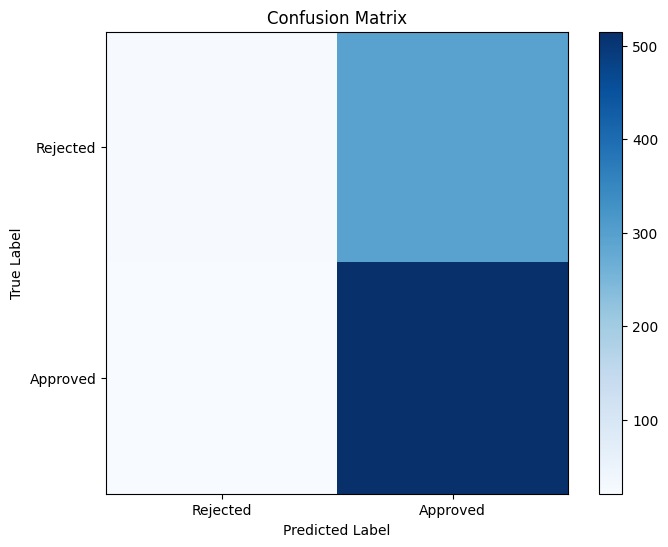

In [32]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.yticks([0, 1], ['Rejected', 'Approved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

LOAD THE MODEL

In [36]:
#load the model
with open('loan_approval_model.pkl', 'wb') as file:
    pickle.dump(model, file)